In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Zomato data .csv')

In [ ]:
data.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [ ]:
data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
data.shape


(148, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
def rating (value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
data['rate'] = data['rate'].apply(rating)

In [ ]:
data.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


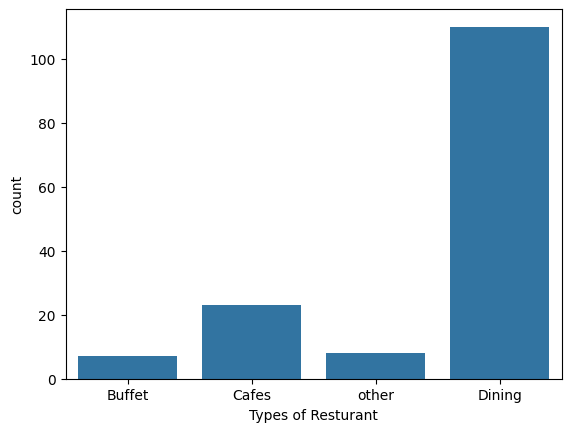

In [ ]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel('Types of Resturant');

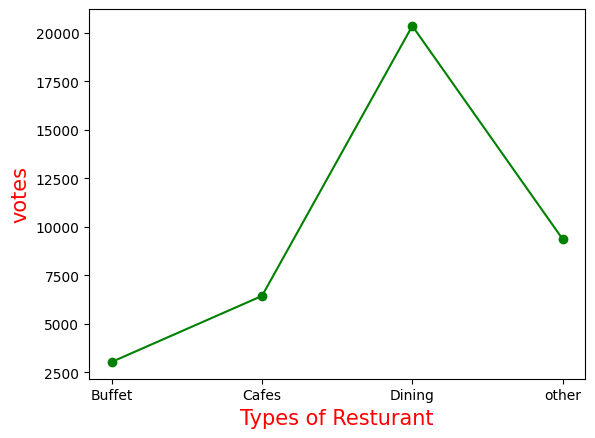

In [ ]:
group_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Types of Resturant', c='red', size=15)
plt.ylabel('votes', c='red', size=15);

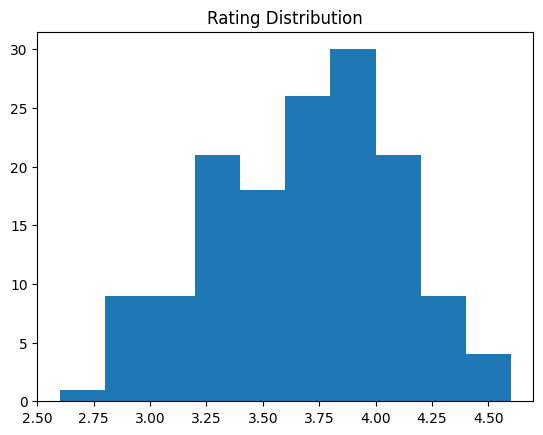

In [ ]:
plt.hist(data['rate'], bins=10)
plt.title('Rating Distribution');

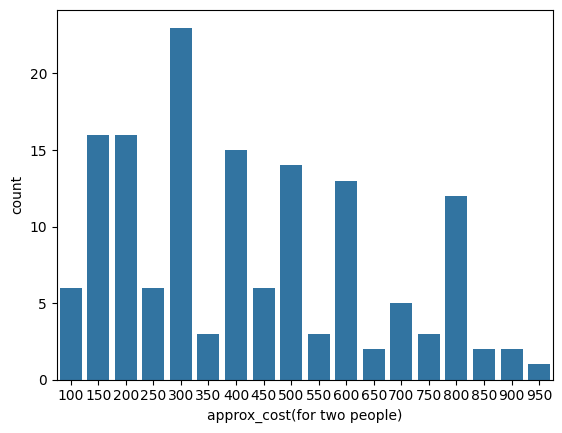

In [ ]:
sns.countplot(x=data['approx_cost(for two people)']);

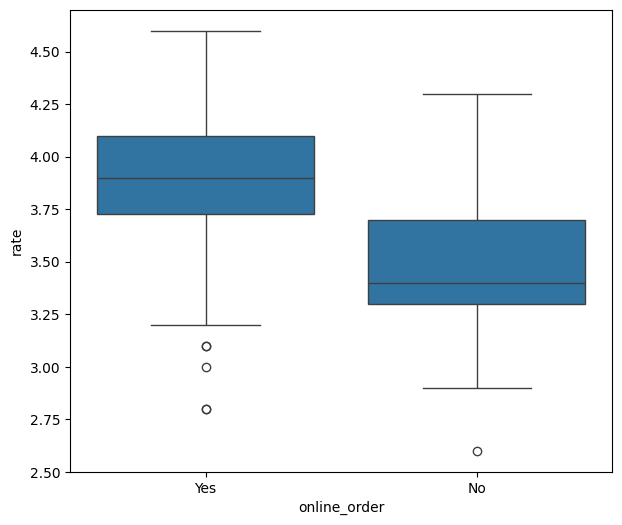

In [ ]:
plt.figure(figsize=(7,6))
sns.boxplot(x = 'online_order', y = 'rate', data=data);


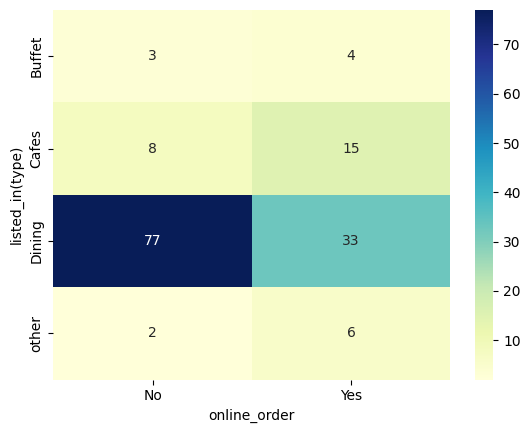

In [ ]:
pivot_table = data.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d');